In [229]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [230]:
df = pd.read_csv('../data/dados-cafe-testes.csv')
df['data'] = pd.to_datetime(df['data'])
df = df.set_index("data")
df.head()

,preco_anterior_br,preco_2_anterior_br,var_preco_anterior_2_anterior_br,var_preco_anterior_2_anterior_eua,dolar,preco_br
data,,,,,,
2012-06-01,476.49,481.49,-5.00,0.68,1.8579,481.91
2012-09-01,481.91,476.49,5.42,5.80,1.8329,488.41
2012-10-01,488.41,481.91,6.50,6.87,1.7995,491.50
2012-11-01,491.50,488.41,3.09,7.60,1.8030,504.65
2012-12-01,504.65,491.50,13.15,0.88,1.7780,501.74


In [231]:
scaler_x = MinMaxScaler()
df[['preco_anterior_br', 'preco_2_anterior_br', 'var_preco_anterior_2_anterior_eua', 'var_preco_anterior_2_anterior_br', 'dolar']] = scaler_x.fit_transform(df[['preco_anterior_br', 'preco_2_anterior_br', 'var_preco_anterior_2_anterior_eua', 'var_preco_anterior_2_anterior_br', 'dolar']])

In [232]:
scaler_y = MinMaxScaler()
df[['preco_br']] = scaler_y.fit_transform(df[['preco_br']])

In [233]:
year_list = df.index.year.unique().tolist()
splits = {'train': [], 'test': []}

for idx, yr in enumerate(year_list[:-1]):
    train_yr = year_list[:idx+1]
    test_yr = [year_list[idx+1]]
    print('TRAIN: ', train_yr, 'TEST: ',test_yr)
    
    splits['train'].append(df.loc[df.index.year.isin(train_yr), :])
    splits['test'].append(df.loc[df.index.year.isin(test_yr), :])
    
    X_train = splits['train'][idx].drop(['preco_br'], axis = 1).values # X
    y_train = splits['train'][idx]['preco_br'].values # Y
    
    X_test =  splits['test'][idx].drop(['preco_br'], axis = 1).values
    y_test = splits['test'][idx]['preco_br'].values
    
# [x] Linear Regressor
    lr_reg = LinearRegression().fit(X_train, y_train)
    lr_pred = lr_reg.predict(X_test)
    print('LR SCORE: ', r2_score(y_test, lr_pred))
    
# [x] MLP Regressor
    mlp_reg = MLPRegressor(random_state=1, max_iter=600).fit(X_train, y_train)
    mlp_pred = mlp_reg.predict(X_test)
    print('MLP SCORE: ', r2_score(y_test, mlp_pred))

# [x] KNN Regressor
    neigh_reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
    neigh_pred = neigh_reg.predict(X_test)
    print('KNN SCORE: ', r2_score(y_test, neigh_pred))


# [x] # Decision Tree Regressor
    tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
    tree_pred = tree_reg.predict(X_test)
    print('TREE SCORE: ', r2_score(y_test, tree_pred))

# [ ] GaussianNB Regressor
    bayes_reg = linear_model.BayesianRidge().fit(X_train, y_train)
    bayes_pred = bayes_reg.predict(X_test)
    print("BAYES SCORE: ", r2_score(y_test, bayes_pred))

# [x] Dummy Regressor [x]
    dummy_reg = DummyRegressor(strategy="median").fit(X_train, y_train)
    dummy_pred = dummy_reg.predict(X_test)
    print('DUMMY SCORE: ', r2_score(y_test, dummy_pred), '\n')
    

TRAIN:  [2012] TEST:  [2013]
LR SCORE:  0.9810240077426471
MLP SCORE:  -0.16444702773337871
KNN SCORE:  -3.4286498346972225
TREE SCORE:  -3.2613195608286905
BAYES SCORE:  0.9810012781448769
DUMMY SCORE:  -12.537090605675848 

TRAIN:  [2012, 2013] TEST:  [2014]
LR SCORE:  0.9914656868544733
MLP SCORE:  0.9631335678250053
KNN SCORE:  0.9006387495703534
TREE SCORE:  0.8541495680442149
BAYES SCORE:  0.9915029912659142
DUMMY SCORE:  -2.0655017694263345 

TRAIN:  [2012, 2013, 2014] TEST:  [2015]
LR SCORE:  0.9667348406848784
MLP SCORE:  0.8990077350552772
KNN SCORE:  0.37942268688186
TREE SCORE:  0.8880742196416715
BAYES SCORE:  0.9667624825684521
DUMMY SCORE:  -10.21701495765664 

TRAIN:  [2012, 2013, 2014, 2015] TEST:  [2016]
LR SCORE:  0.9752835750903927
MLP SCORE:  0.8690226426076126
KNN SCORE:  0.032004246137512404
TREE SCORE:  0.25324717084575354
BAYES SCORE:  0.9752748402195717
DUMMY SCORE:  -14.955127718767908 

TRAIN:  [2012, 2013, 2014, 2015, 2016] TEST:  [2017]
LR SCORE:  0.984411

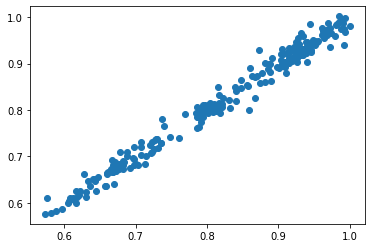

In [234]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predi)